In [ ]:
!kaggle datasets download -d yudhaislamisulistya/plants-type-datasets

Dataset URL: https://www.kaggle.com/datasets/yudhaislamisulistya/plants-type-datasets
License(s): copyright-authors
 99% 932M/937M [00:28<00:00, 37.9MB/s]
100% 937M/937M [00:28<00:00, 34.2MB/s]


In [ ]:
!unzip plants-type-datasets.zip

Streaming output truncated to the last 5000 lines.
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6496.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6498.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6500.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6503.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6527.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6528.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6530.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6532.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6540.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6584.jpg  
  inflating: split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacc

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
train_dir = '/content/split_ttv_dataset_type_of_plants/Train_Set_Folder'
val_dir = '/content/split_ttv_dataset_type_of_plants/Validation_Set_Folder'

In [ ]:
img_size = (224, 224)
batch_size = 32
num_classes = 30

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 23972 images belonging to 30 classes.
Found 3030 images belonging to 30 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),

    Dense(num_classes, activation='softmax')
])
optimizer = Adam(learning_rate=1e-3)


model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    epochs=1,
    validation_data=val_generator,
)

750/750 ━━━━━━━━━━━━━━━━━━━━ 277s 366ms/step - accuracy: 0.6929 - loss: 0.9728 - val_accuracy: 0.7914 - val_loss: 0.6572


In [ ]:

model.save('model_epochs.h5')


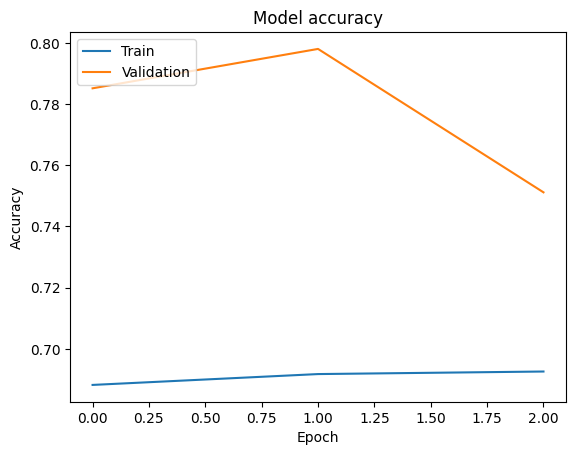

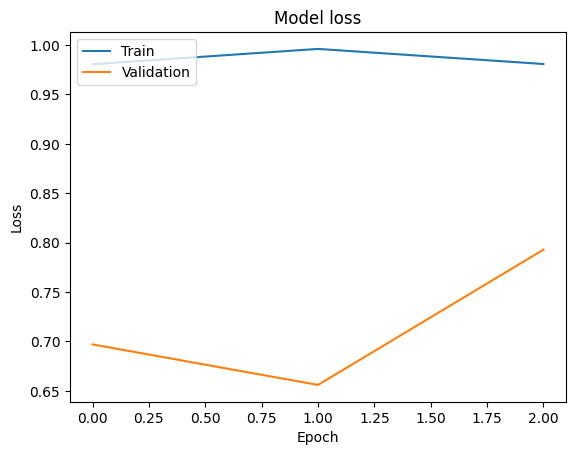

In [ ]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()